In [1]:
import sys
sys.path.append("..")
from roast import optimiser, config

In [2]:
# Note: PuLP can run into trouble if repeatedly building solvers in a notebook environment.
# Safest bet is to hit `Restart & Run All` after making changes.

In [3]:
# size should be defined relative to one oven shelf. Size=1 -> one whole shelf
dish_conf = [
    config.DishConfig(name="potatoes", size=1, oven_mins=60, serve_hot_weight=5),
    config.DishConfig(name="stuffing", size=0.5, oven_mins=30, serve_hot_weight=2),
    config.DishConfig(name="nut_roast", size=0.25, oven_mins=60, serve_hot_weight=3),
    config.DishConfig(name="yorkshires", size=0.5, oven_mins=10, serve_hot_weight=5),
    config.DishConfig(name="cauliflower_cheese", size=0.5, oven_mins=30, serve_hot_weight=3),
]

system_conf = config.SystemConfig(
    # all times defined in minutes
    total_time=120,  # total time allowed for cooking
    # problem is defined on a fixed time grid -- smaller increment allows finer control but will increase solving time
    time_increment=10,
    # dish is not considered to be cooking until it's been in the oven for `warm_up_time` minutes
    warm_up_time=10,
    num_oven_shelves=2,
    # objective trades off dish-hotness against number of oven openings. Increase weight to reduce oven openings.
    oven_opening_penalty=1,
)
opt = optimiser.Optimiser(system_conf, dish_conf)
opt.solve()
results = opt.get_results()

<AxesSubplot:>

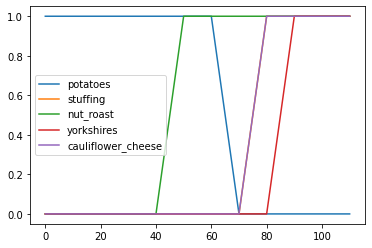

In [4]:
import pandas as pd
res = opt.get_results()
pd.DataFrame({name: res[name]["is_in"] for name in res}).plot()